In [16]:
#Import all needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson, norm
import warnings
warnings.filterwarnings('ignore')

In [17]:
#Read the dataset
df_migration = pd.read_csv('PEA03.20231017T231015.csv')
df_migration.head()

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,NaN
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,NaN


In [18]:
#Statistical discription of dataset
df_migration.describe()

,Year,VALUE
count,1998.000000,1683.000000
mean,2005.000000,10.856625
std,10.679751,17.070445
min,1987.000000,-43.900000
25%,1996.000000,1.200000
50%,2005.000000,4.500000
75%,2014.000000,14.000000
max,2023.000000,151.100000


<AxesSubplot:xlabel='VALUE', ylabel='Count'>

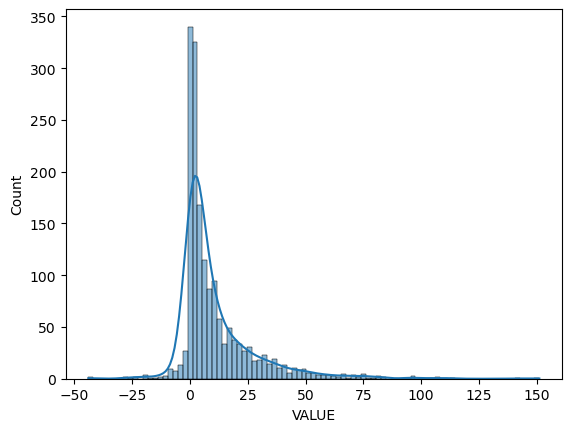

In [19]:
#Histplot for Value
sns.histplot(df_migration['VALUE'].dropna(), kde=True)


(array([0, 1, 2]),
 [Text(0, 0, 'Net migration'),
  Text(1, 0, 'Emigrants: All destinations'),
  Text(2, 0, 'Immigrants: All origins')])

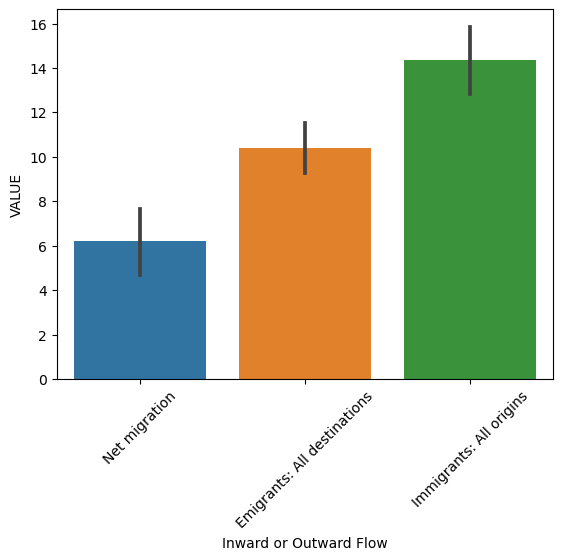

In [20]:
#Barplot for Inward or Outward Flow and VALUE
sns.barplot(x="Inward or Outward Flow", y="VALUE", data=df_migration)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Sex', ylabel='VALUE'>

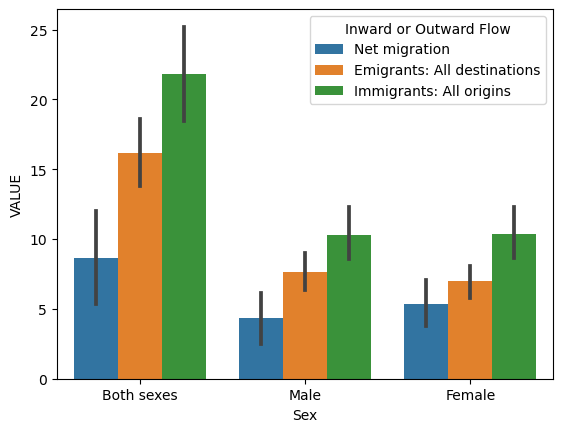

In [21]:
#Barplot for Sex and VALUE
sns.barplot(x="Sex", y="VALUE", hue='Inward or Outward Flow', data=df_migration)


<AxesSubplot:xlabel='Inward or Outward Flow', ylabel='count'>

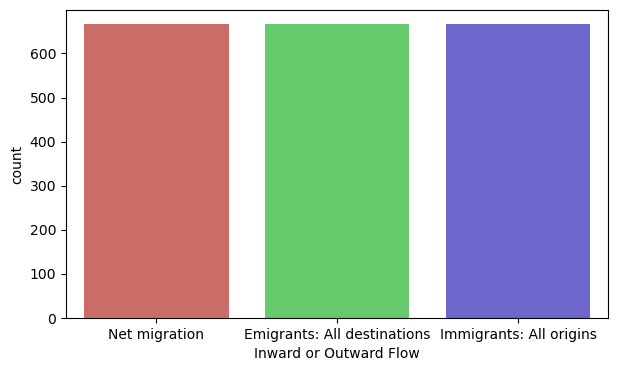

In [22]:
#Countplot for Inward or Outward Flow
plt.figure(figsize=(7, 4))
sns.countplot(x='Inward or Outward Flow', data=df_migration, palette ='hls')


In [23]:
#Filling the NAN value column with mean
mean_value = df_migration['VALUE'].mean()
df_migration['VALUE'].fillna(mean_value, inplace=True)

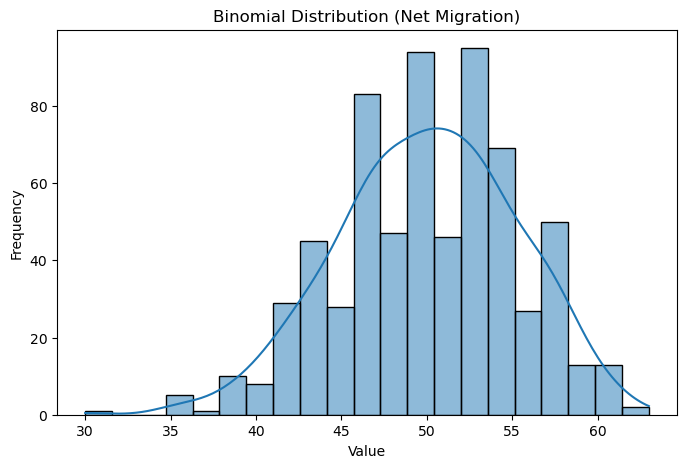

In [24]:
# Using Binomial distribution to model Net Migration
n = 100  # Number of trials
p = 0.5  # Probability of success 
binomial_data = binom.rvs(n, p, size=len(df_migration[df_migration['Inward or Outward Flow'] == 'Net migration']))

# Visualize Binomial distribution
plt.figure(figsize=(8, 5))
sns.histplot(binomial_data, kde=True)
plt.title('Binomial Distribution (Net Migration)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()



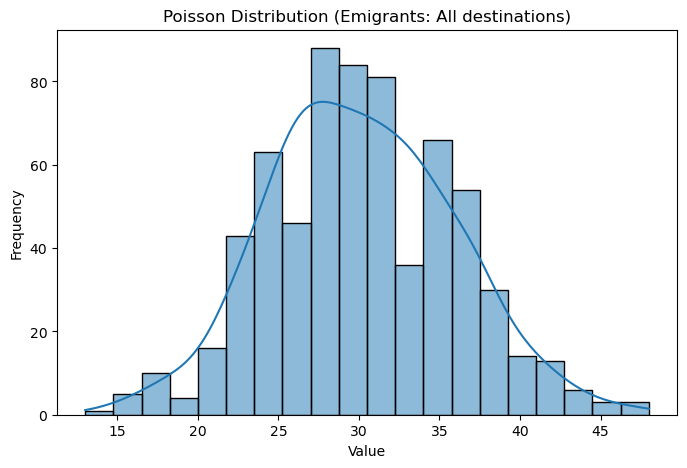

In [25]:
# Using Poisson distribution to model Emigrants: All destinations
lambda_parameter = 30  # Average number of events in a fixed interval
poisson_data = poisson.rvs(lambda_parameter, size=len(df_migration[df_migration['Inward or Outward Flow'] == 'Emigrants: All destinations']))
# Visualize Poisson distribution
plt.figure(figsize=(8, 5))
sns.histplot(poisson_data, kde=True)
plt.title('Poisson Distribution (Emigrants: All destinations)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

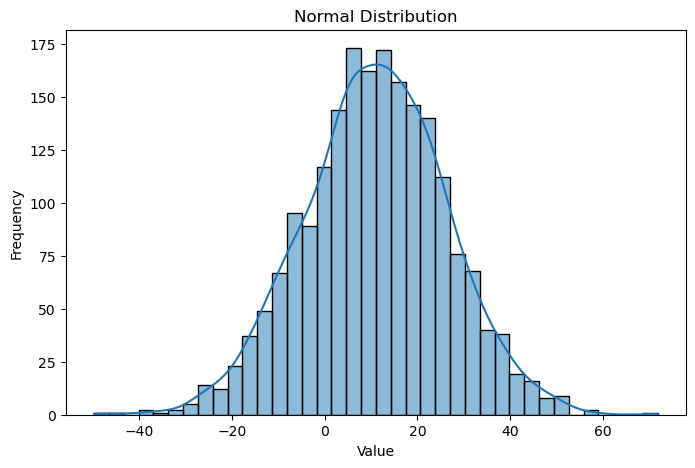

In [26]:
# Using Normal distribution to model the data
mean, std_dev = df_migration['VALUE'].mean(), df_migration['VALUE'].std()
normal_data = norm.rvs(mean, std_dev, size=len(df_migration))

# Visualize Normal distribution
plt.figure(figsize=(8, 5))
sns.histplot(normal_data, kde=True)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
